# Seção 1: Introdução à Redução de Dimensionalidade

### Definição de Redução de Dimensionalidade
- **Redução de Dimensionalidade** refere-se ao processo de reduzir o número de variáveis aleatórias sob consideração, obtendo um conjunto de variáveis principais. Em machine learning, isso é frequentemente realizado para simplificar modelos e reduzir a complexidade computacional.

### Por que é Importante
1. **Simplificação de Modelos**: Modelos com menos variáveis são mais fáceis de interpretar e menos propensos a overfitting.
2. **Melhoria de Performance**: Menor dimensionalidade pode levar a tempos de treinamento e inferência mais rápidos, bem como a uma melhor generalização do modelo.
3. **Visualização de Dados**: Reduzir a dimensionalidade dos dados para duas ou três dimensões permite a visualização em gráficos, facilitando a compreensão das relações entre as variáveis e identificação de padrões.

# Seção 2: Principal Component Analysis (PCA)

### Teoria Básica do PCA (Análise de Componentes Principais)

- **O que é PCA?** 
  - Imagine que você tem muitos dados, como uma pilha de livros. O PCA ajuda a reorganizar essa pilha de forma que os livros mais importantes fiquem no topo. Aqui, cada 'livro' é uma informação sobre seus dados, e os 'mais importantes' são aqueles que contêm a maior parte da informação.
- **Componentes Principais**: 
  - São como os resumos dos seus livros. O primeiro resumo (componente principal) tenta capturar a maior parte da história contida na sua pilha de livros. O segundo resumo tenta capturar a maior parte da história restante, mas sem repetir nada do que já foi dito no primeiro.
- **Variação e Ortogonalidade**: 
  - Variação é o quanto de 'novidade' cada resumo (componente) traz sobre a história total. Ortogonalidade é um termo técnico que, neste caso, significa que cada resumo fala de partes diferentes da história, sem sobreposição.

Essa é a ideia básica do PCA: reduzir a complexidade dos seus dados, mas tentando manter a maior parte da informação original, organizando-a de forma inteligente.

---

### Interpretação Geométrica e Estatística do PCA

- **Interpretação Geométrica**:
  - Imagine seus dados como um enxame de abelhas voando no espaço. Cada abelha é um ponto de dado. O PCA ajuda a encontrar a melhor lente de câmera (um novo ponto de vista) para fotografar esse enxame de modo que você possa ver o máximo possível das abelhas em uma única foto. Essa 'foto' é o novo espaço com os componentes principais como eixos.
- **Interpretação Estatística**:
  - Se cada abelha no enxame estivesse falando (representando uma variável), o PCA seria como um microfone direcional que tenta captar as conversas mais altas e distintas. Isso se relaciona com a análise de quão relacionadas (correlacionadas) estão as 'vozes' das abelhas (variáveis) e quão alto cada grupo de abelhas está falando (covariância).

Essas interpretações ajudam a entender o PCA como uma técnica para capturar a essência dos seus dados, seja visualizando-os de uma nova perspectiva ou ouvindo as partes mais importantes da história que eles contam.

---

### Variação Explicada e Seleção do Número de Componentes no PCA

- **Variação Explicada**:
  - Pense na 'variação explicada' como a quantidade de tesouro que cada componente principal consegue encontrar. Em outras palavras, é quanto cada componente ajuda a entender os dados. Se um componente encontra muito tesouro (informação), ele explica muito sobre os dados.
- **Seleção do Número de Componentes**:
  - Escolher quantos componentes principais manter é como decidir quantos detetives você quer para encontrar o tesouro nos seus dados. Você pode usar um gráfico chamado 'Scree Plot', que mostra o quanto de tesouro (informação) cada detetive (componente) encontra. Normalmente, você mantém os detetives que encontram mais tesouro e dispensa os que encontram menos.

Usar a variação explicada e o Scree Plot ajuda a tomar decisões informadas sobre quantos componentes principais você deve manter para capturar a maior parte da informação nos seus dados, sem manter partes desnecessárias.

---

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Carregando um dataset exemplo com alta dimensionalidade
# Neste exemplo, estamos usando o dataset 'digits', que é um conjunto de imagens de dígitos escritos à mão
digits = load_digits()
X = digits.data
y = digits.target

# Função para exibir os valores de X
def plot_handwritten_digit_from_array(digit_array, digit_value):
    """
    Plota a imagem de um dígito escrito à mão a partir de um array de pixels.

    Parâmetros:
    digit_array (array): Array de 64 elementos representando um dígito escrito à mão.

    Retorna:
    None
    """
    # Verificando se o array tem o tamanho correto
    if len(digit_array) != 64:
        print("O array deve ter 64 elementos.")
        return

    # Redimensionando o array para 8x8 para plotagem
    digit_image = digit_array.reshape(8, 8)

    # Plotando a imagem
    plt.figure(figsize=(2, 2))
    plt.imshow(digit_image, cmap='gray')
    plt.title(f'Dígito "{digit_value}" Escrito à Mão')
    plt.axis('off')
    plt.show()

In [2]:
y[45]

3

In [3]:
X[45]

array([ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16.,
       16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
        0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8.,
       11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.])

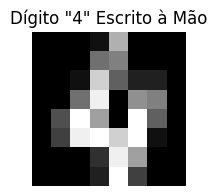

In [4]:
plot_handwritten_digit_from_array(X[4],y[4])

In [5]:
# Aplicando PCA
# Neste exemplo, vamos reduzir os dados para 2 dimensões para fins de visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Explicações dos Gráficos Gerados pelo PCA

### 1. Visualização dos Componentes Principais
- **Objetivo do Gráfico**:
  - Este gráfico de dispersão mostra os dados do dataset 'digits' após a aplicação do PCA, que os reduziu para 2 dimensões.
- **Detalhes do Gráfico**:
  - Cada ponto no gráfico representa um dígito escrito à mão.
  - O eixo X representa o primeiro componente principal, e o eixo Y representa o segundo componente principal.
  - A cor de cada ponto indica o dígito real (0 a 9) que o ponto representa.
  - Este gráfico ajuda a visualizar como os dígitos diferentes estão distribuídos no espaço de 2 dimensões.

### 2. Variação Explicada por Cada Componente
- **Objetivo do Gráfico**:
  - O gráfico de barras mostra quanta informação (variação) cada um dos componentes principais retém do dataset original.
- **Detalhes do Gráfico**:
  - As barras representam a proporção da variação total do dataset que cada componente principal captura.
  - O primeiro componente principal geralmente captura a maior parte da variação, enquanto o segundo captura uma quantidade menor.
  - Este gráfico é útil para entender a eficácia do PCA em reduzir a dimensionalidade dos dados preservando ao mesmo tempo a maior parte da informação.

---

Esses gráficos são ferramentas essenciais para entender os resultados do PCA, oferecendo uma visão clara de como os dados foram transformados e quanta informação cada componente principal conseguiu reter.


C:\Users\LeaoN\AppData\Local\Temp\ipykernel_38332\799184853.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


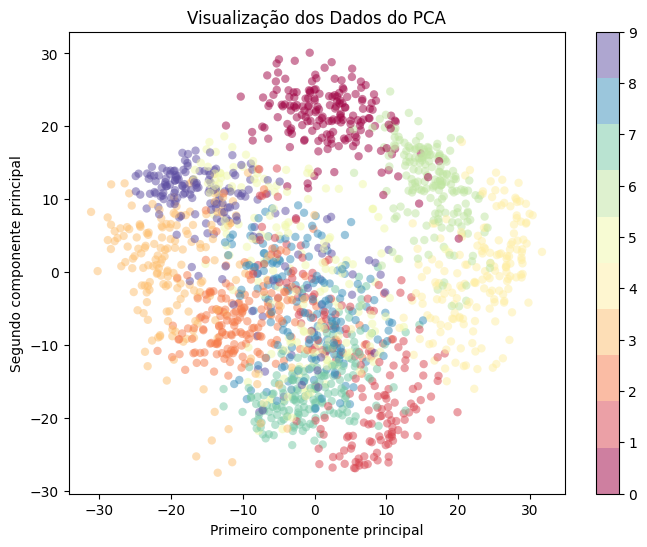

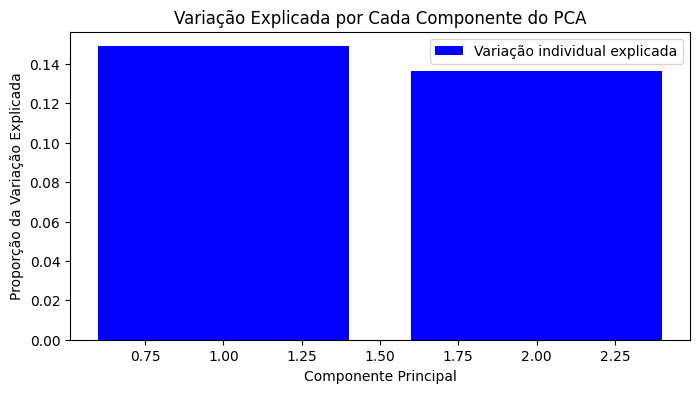

In [6]:
# Visualizando os componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.colorbar()
plt.title('Visualização dos Dados do PCA')
plt.show()

# Visualizando a variação explicada por cada componente
plt.figure(figsize=(8, 4))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', label='Variação individual explicada')
plt.ylabel('Proporção da Variação Explicada')
plt.xlabel('Componente Principal')
plt.legend(loc='best')
plt.title('Variação Explicada por Cada Componente do PCA')
plt.show()

# Notas:
# 1. Este código aplica PCA ao dataset 'digits' e o reduz para 2 componentes principais.
# 2. Em seguida, visualiza os dados transformados em um gráfico de dispersão, colorido por dígitos.
# 3. Por fim, exibe um gráfico de barras mostrando a quantidade de variação explicada por cada componente.


# Seção 3: Linear Discriminant Analysis (LDA)


### Diferenças Fundamentais entre PCA e LDA
- **PCA (Principal Component Analysis)** é uma técnica não-supervisionada que busca a direção de máxima variação nos dados, independentemente das classes.
- **LDA (Linear Discriminant Analysis)**, por outro lado, é uma técnica supervisionada que busca maximizar a separação entre diferentes classes. 
- Enquanto o PCA busca direções que maximizam a variação total, o LDA foca em encontrar um espaço que maximize a separação entre classes.

## Teoria do LDA: Maximizando a Diferença Entre Grupos

- **O que é LDA (Linear Discriminant Analysis)?**
  - Imagine que você está organizando uma série de fotos de diferentes grupos de pessoas (classes). O LDA é como um mágico da fotografia que arranja as pessoas de modo que os grupos fiquem o mais distintos possível uns dos outros.

- **Maximizando a Distinção Entre Grupos**:
  - O LDA busca a melhor forma de arranjar as fotos para que cada grupo se destaque claramente. Ele faz isso garantindo que os grupos estejam o mais separados possível (maximizando a variância entre classes) e que as pessoas dentro de cada grupo estejam o mais próximas possível umas das outras (minimizando a variância dentro das classes).

- **Encontrando os Melhores Eixos**:
  - Matematicamente, o LDA procura linhas imaginárias (eixos) que passam pelos grupos, de forma a maximizar a distância entre os centros de cada grupo (médias das classes) e, ao mesmo tempo, manter cada grupo o mais unido possível.


---

Esta seção introduz o LDA como uma poderosa técnica de redução de dimensionalidade, especialmente útil em contextos onde a classificação é um objetivo chave.


In [7]:
# Importando as bibliotecas necessárias
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine

# Carregando um dataset exemplo para classificação
# Neste exemplo, estamos usando o dataset 'wine', que é um conjunto de dados de classificação
wine = load_wine()
X = wine.data
y = wine.target

In [8]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
X.shape

(178, 13)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Entendendo as Limitações de Componentes no LDA

A Análise Discriminante Linear (LDA) é uma técnica poderosa de redução de dimensionalidade em Machine Learning, mas vem com uma limitação específica quanto ao número de componentes que pode extrair. Vamos entender essa limitação.

## LDA e o Número Máximo de Componentes

- **Limitação Fundamental**:
  - O número máximo de componentes que o LDA pode extrair é determinado pelo menor valor entre:
    - O número de características (features) do dataset.
    - O número de classes menos um (`n_classes - 1`).

- **Por que essa Limitação Existe?**:
  - O LDA funciona maximizando a separação entre as classes. Matematicamente, isso é feito encontrando eixos ou direções que maximizam a distância entre os centros das classes.
  - O número de eixos úteis para essa separação é limitado pelo número de classes que você tem menos um. Isso ocorre porque, em um espaço de `N` dimensões, você pode ter no máximo `N-1` direções que separam efetivamente `N` pontos (ou classes).

## Aplicação Prática

- **Exemplo com 3 Classes**:
  - Se o dataset tem 3 classes, o número máximo de componentes que o LDA pode usar é `3 - 1 = 2`.
  - Tentar usar um `n_components` maior do que 2 resultará em um erro, já que não é possível criar mais de 2 eixos discriminantes para 3 classes.

In [11]:
# Aplicando LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
X_lda.shape

(178, 2)

In [12]:
# Aplicando PCA para comparação
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(178, 2)

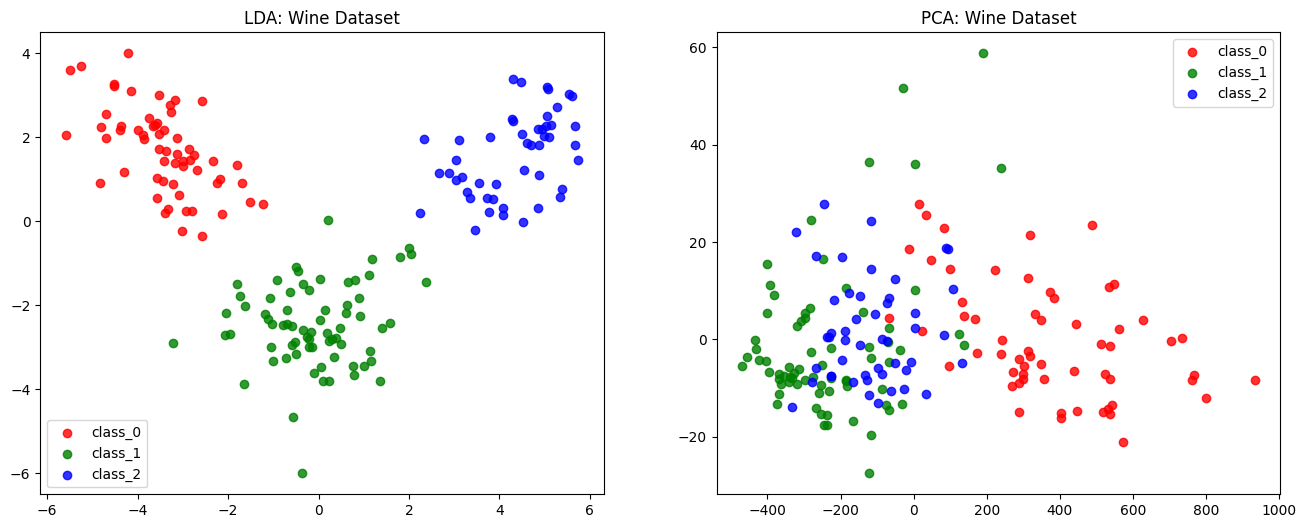

In [13]:
# Função para plotar os resultados
def plot_scatter(X, y, title, ax):
    colors = ['red', 'green', 'blue']
    for color, i, target_name in zip(colors, [0, 1, 2], wine.target_names):
        ax.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, color=color, label=target_name)
    ax.legend(loc='best', shadow=False, scatterpoints=1)
    ax.title.set_text(title)

# Visualizando os resultados
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_scatter(X_lda, y, 'LDA: Wine Dataset', ax[0])
plot_scatter(X_pca, y, 'PCA: Wine Dataset', ax[1])

plt.show()

# Notas:
# 1. Este código aplica LDA e PCA ao dataset 'wine' e os reduz para 2 componentes.
# 2. Em seguida, visualiza os dados transformados usando LDA e PCA em gráficos de dispersão separados.
# 3. A comparação entre LDA e PCA ajuda a entender as diferenças em como eles tratam a separabilidade das classes.

## Comparando com os exemplos dos dígitos

C:\Users\LeaoN\AppData\Local\Temp\ipykernel_38332\1673522957.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
C:\Users\LeaoN\AppData\Local\Temp\ipykernel_38332\1673522957.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter_lda = axs[1].scatter(X_lda[:, 0], X_lda[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))


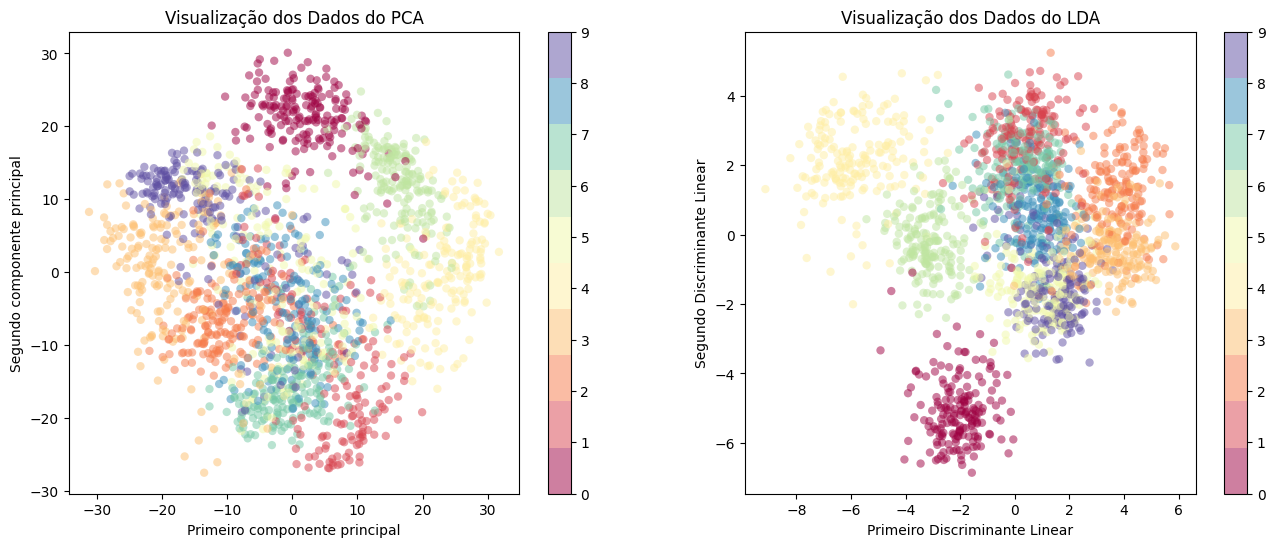

In [14]:
digits = load_digits()
X = digits.data
y = digits.target

# Aplicando LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Aplicando PCA para comparação
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Configurando o layout dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico PCA
scatter = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
axs[0].set_xlabel('Primeiro componente principal')
axs[0].set_ylabel('Segundo componente principal')
axs[0].set_title('Visualização dos Dados do PCA')

# Gráfico LDA
scatter_lda = axs[1].scatter(X_lda[:, 0], X_lda[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
axs[1].set_xlabel('Primeiro Discriminante Linear')
axs[1].set_ylabel('Segundo Discriminante Linear')
axs[1].set_title('Visualização dos Dados do LDA')

# Adicionando barra de cores
fig.colorbar(scatter, ax=axs[0], orientation='vertical')
fig.colorbar(scatter_lda, ax=axs[1], orientation='vertical')

plt.show()

# Seção 4: Considerações Finais e Melhores Práticas em Redução de Dimensionalidade

## Escolhendo Entre PCA e LDA

### PCA (Principal Component Analysis)
- **Descrição**: Técnica não-supervisionada para transformar dados em componentes principais ortogonais.
- **Uso Ideal**: Para visualização de dados, análise exploratória e casos onde as classes não são o foco.
- **Aplicação em Machine Learning**:
  - **Classificação e Regressão**: Útil para ambos, especialmente para reduzir a dimensionalidade e evitar overfitting.
  - **Independência de Classes**: Não considera a separação de classes, o que pode ser limitante em certos casos de classificação.

### LDA (Linear Discriminant Analysis)
- **Descrição**: Técnica supervisionada focada em maximizar a separabilidade entre classes conhecidas.
- **Uso Ideal**: Para tarefas de classificação onde a distinção clara entre grupos é necessária.
- **Aplicação em Machine Learning**:
  - **Classificação**: Altamente eficaz em classificação devido à sua natureza supervisionada e foco em separabilidade de classes.
  - **Limitações**: Pressupõe distribuições gaussianas com covariâncias iguais entre as classes, o que pode não ser verdade em todos os datasets.
  - **Regressão**: Pode ser adaptado para regressão ao categorizar variáveis dependentes contínuas.

## Quando Escolher Cada Um?
- **PCA**: Escolha o PCA quando a redução de dimensionalidade para visualização ou análise exploratória é o principal objetivo, independentemente das classes.
- **LDA**: Prefira o LDA quando o foco está na maximização da separabilidade entre classes conhecidas, especialmente em problemas de classificação.

# Seção 5: Técnicas Famosas de Redução de Dimensionalidade em Machine Learning

A redução de dimensionalidade é uma técnica crucial em Machine Learning para simplificar os dados sem perder informações essenciais. Vamos explorar algumas das técnicas mais famosas, suas aplicações e em que tipo de problemas de aprendizado elas são mais utilizadas.

## PCA (Principal Component Analysis)
- **Descrição**: Reduz a dimensionalidade transformando os dados em componentes principais.
- **Indicação de Utilização**: Ideal para visualização de dados e pré-processamento em problemas complexos.
- **Aplicação**: Útil tanto em problemas supervisionados (classificação e regressão) quanto em não supervisionados.

## LDA (Linear Discriminant Analysis)
- **Descrição**: Foca na maximização da separabilidade entre classes conhecidas.
- **Indicação de Utilização**: Mais eficaz em problemas de classificação supervisionada.
- **Aplicação**: Principalmente usada em problemas de classificação supervisionada.

## t-SNE (t-Distributed Stochastic Neighbor Embedding)
- **Descrição**: Técnica não-linear para redução de dimensionalidade, mantendo a estrutura local dos dados.
- **Indicação de Utilização**: Excelente para visualização de dados de alta dimensionalidade.
- **Aplicação**: Comumente usada em problemas não supervisionados, mas pode ser útil em etapas exploratórias de problemas supervisionados.

## UMAP (Uniform Manifold Approximation and Projection)
- **Descrição**: Semelhante ao t-SNE, mas mais rápido e escalável.
- **Indicação de Utilização**: Boa para visualização e exploração de estruturas complexas.
- **Aplicação**: Usada principalmente em análises não supervisionadas.

## Autoencoders
- **Descrição**: Redes neurais para aprender representações codificadas dos dados.
- **Indicação de Utilização**: Usado em redução de dimensionalidade e aprendizado de características.
- **Aplicação**: Principalmente em problemas não supervisionados, mas também pode ser útil como pré-processamento em problemas supervisionados.

## Feature Selection Techniques
- **Descrição**: Métodos para selecionar um subconjunto relevante de variáveis.
- **Indicação de Utilização**: Para reduzir a dimensionalidade preservando variáveis importantes.
- **Aplicação**: Aplicável tanto em problemas supervisionados (classificação e regressão) quanto não supervisionados.

## Isomap (Isometric Mapping)
- **Descrição**: Técnica não-linear que preserva distâncias geodésicas entre pontos.
- **Indicação de Utilização**: Útil para dados com estrutura não-linear complexa.
- **Aplicação**: Mais comumente utilizada em análises não supervisionadas.

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('saude_fetal.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   valor_base                                          2126 non-null   int64  
 1   aceleracoes                                         2126 non-null   float64
 2   movimento_fetal                                     2126 non-null   float64
 3   contracoes_uterinas                                 2126 non-null   float64
 4   desaceleracoes_leves                                2126 non-null   float64
 5   desaceleracoes_severas                              2126 non-null   float64
 6   desaceleracoes_prolongadas                          2126 non-null   float64
 7   variabilidade_curto_prazo_anormal                   2126 non-null   int64  
 8   media_variabilidade_curto_prazo                     2126 non-null   float64
 9

In [18]:
df.isna().sum()

valor_base                                            0
aceleracoes                                           0
movimento_fetal                                       0
contracoes_uterinas                                   0
desaceleracoes_leves                                  0
desaceleracoes_severas                                0
desaceleracoes_prolongadas                            0
variabilidade_curto_prazo_anormal                     0
media_variabilidade_curto_prazo                       0
percentual_tempo_variabilidade_longo_prazo_anormal    0
media_variabilidade_longo_prazo                       0
largura_histograma                                    0
minimo_histograma                                     0
maximo_histograma                                     0
numero_picos_histograma                               0
numero_zeros_histograma                               0
modo_histograma                                       0
media_histograma                                

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valor_base,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
aceleracoes,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
movimento_fetal,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
contracoes_uterinas,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
desaceleracoes_leves,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
desaceleracoes_severas,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
desaceleracoes_prolongadas,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
variabilidade_curto_prazo_anormal,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
media_variabilidade_curto_prazo,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentual_tempo_variabilidade_longo_prazo_anormal,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# Aplicação de PCA ou LDA em Processos de Classificação em Machine Learning

O uso de técnicas como PCA (Principal Component Analysis) e LDA (Linear Discriminant Analysis) é uma etapa fundamental em muitos fluxos de trabalho de Machine Learning, especialmente em tarefas de classificação. Vamos explorar em que momento do processo elas devem ser aplicadas e por que.

## Processo de Classificação: Passos Iniciais
1. **Separação de X e y**: A primeira etapa envolve separar os recursos (X) dos rótulos ou classes (y) no seu conjunto de dados.
2. **Divisão em Treinamento, Validação e Teste**: Em seguida, divide-se o dataset em conjuntos de treinamento, validação e teste para garantir que o modelo possa ser treinado, validado e testado de forma eficaz.

## Aplicação de PCA ou LDA
- **Momento Ideal para Aplicação**:
  - PCA ou LDA devem ser aplicados **após a divisão dos dados** em conjuntos de treinamento, validação e teste, mas **antes da normalização dos dados**.
- **Por que Após a Divisão?**:
  - Essencialmente, a redução de dimensionalidade deve ser feita de maneira a evitar o vazamento de informações do conjunto de teste para o modelo durante o treinamento.
  - Ao aplicar PCA ou LDA após a divisão, você garante que a transformação dos dados seja realizada de forma independente nos conjuntos de treinamento, validação e teste.

## Processo de Aplicação
- **PCA ou LDA no Conjunto de Treinamento**:
  - Use `fit_transform` no conjunto de treinamento. Isso garante que o PCA ou LDA aprenda e aplique a redução de dimensionalidade com base apenas nos dados de treinamento.
- **PCA ou LDA nos Conjuntos de Validação e Teste**:
  - Aplique `transform` nos conjuntos de validação e teste. Isso utiliza os parâmetros aprendidos com o conjunto de treinamento para aplicar a mesma transformação, sem reaprender ou ajustar com base nesses conjuntos.

## Justificativa
- **Evitar Vazamento de Dados**: Aplicando a redução de dimensionalidade após a divisão e usando `fit_transform` apenas no treinamento, evita-se o risco de vazamento de informações do conjunto de teste.
- **Consistência nas Transformações**: Ao usar `transform` nos conjuntos de validação e teste, garante-se que as transformações sejam consistentes e comparáveis entre os diferentes conjuntos de dados.

In [20]:
X = df.drop('saude_fetal', axis = 1).values
y = df[['saude_fetal']].values

In [21]:
from sklearn.model_selection import train_test_split

# Separa 70% dos dados para treinamento
X_train, X_temp , y_train, y_temp = train_test_split(X, y, test_size= 0.3)

# Separa igualmente 50% de 30% (15% do total) para validação e teste
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size= 0.5)

In [22]:
# Aplica LDA nos dados
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)


# Aplica PCA nos dados
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

C:\Users\LeaoN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_train

array([[0],
       [2],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [24]:
# Converter os valores de y para categóricos
from tensorflow.keras.utils import to_categorical

# Conversão dos rótulos para o formato one-hot
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)

In [25]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [26]:
# Normalizar os dados

from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_X_lda = MinMaxScaler()
scaler_X_pca = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train) 
X_val = scaler_X.transform(X_val) 
X_test = scaler_X.transform(X_test) 

X_train_lda  = scaler_X_lda .fit_transform(X_train_lda ) 
X_val_lda  = scaler_X_lda .transform(X_val_lda ) 
X_test_lda  = scaler_X_lda .transform(X_test_lda ) 

X_train_pca = scaler_X_pca.fit_transform(X_train_pca) 
X_val_pca = scaler_X_pca.transform(X_val_pca) 
X_test_pca = scaler_X_pca.transform(X_test_pca) 

In [27]:
X_train.shape

(1488, 21)

In [28]:
X_train_lda.shape

(1488, 2)

In [29]:
X_train_pca.shape

(1488, 6)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
from tensorflow.keras.callbacks import EarlyStopping

def criar_modelo(X_train, n_classes):
    """
    Cria e compila um modelo de Machine Learning com 5 camadas ocultas.

    Parâmetros:
    X_train (array): Dados de treinamento.
    y_train (array): Rótulos de treinamento.

    Retorna:
    model: Modelo de Machine Learning compilado.
    """
    n_features = X_train.shape[1]  # Número de características

    # Criando o modelo
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(n_features,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))  # Camada de saída

    # Compilando o modelo
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def treinar_modelo(model, X_train, y_train, X_val, y_val, epochs = 300, early_stopping = 50):
    """
    Treina um modelo de Machine Learning e exibe gráficos de desempenho.

    Parâmetros:
    model: Modelo de Machine Learning.
    X_train (array): Dados de treinamento.
    y_train (array): Rótulos de treinamento.
    X_val (array): Dados de validação.
    y_val (array): Rótulos de validação.
    epochs (int): Número de épocas para treinamento.
    early_stopping (bool): Se True, aplica Early Stopping.

    Retorna:
    model: Modelo de Machine Learning treinado.
    """
    import matplotlib.pyplot as plt

    
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=early_stopping, restore_best_weights=True)
    callbacks = [early_stopping_callback]

    # Treinando o modelo
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=1, callbacks=callbacks)
    clear_output(wait=False)

    # Plotando gráficos de loss e acurácia
    plt.figure(figsize=(12, 5))

    # Gráfico de Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.title('Gráfico de Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    # Gráfico de Acurácia
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Gráfico de Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.show()

    return model

In [31]:
# Define modelo para os dados normais
modelo = criar_modelo(X_train, 3)

# Define o modelo para os dados de LDA
modelo_lda = criar_modelo(X_train_lda, 3)

# Define o modelo para os dados de PCA
modelo_pca = criar_modelo(X_train_pca, 3)

In [32]:
# Define a quantidade de épocas
epochs = 200

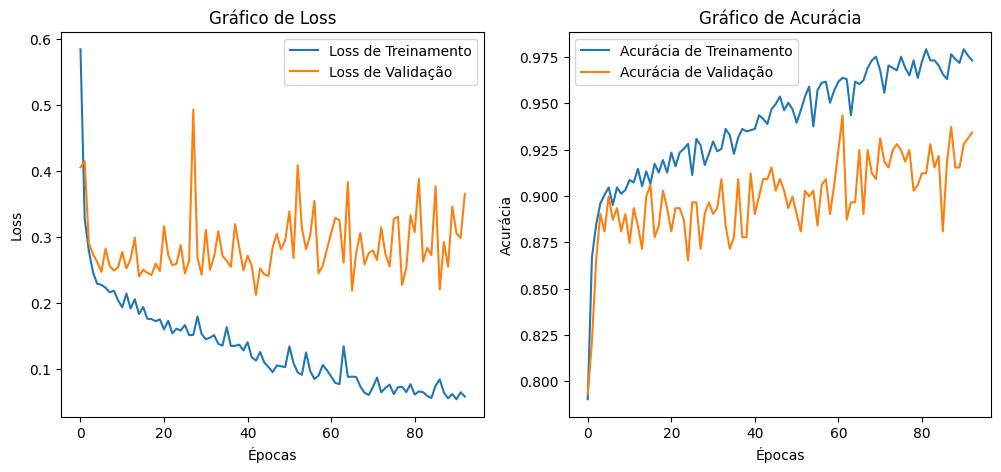

In [33]:
# Define modelo para os dados normais
modelo = treinar_modelo(modelo, X_train, y_train, X_val, y_val)

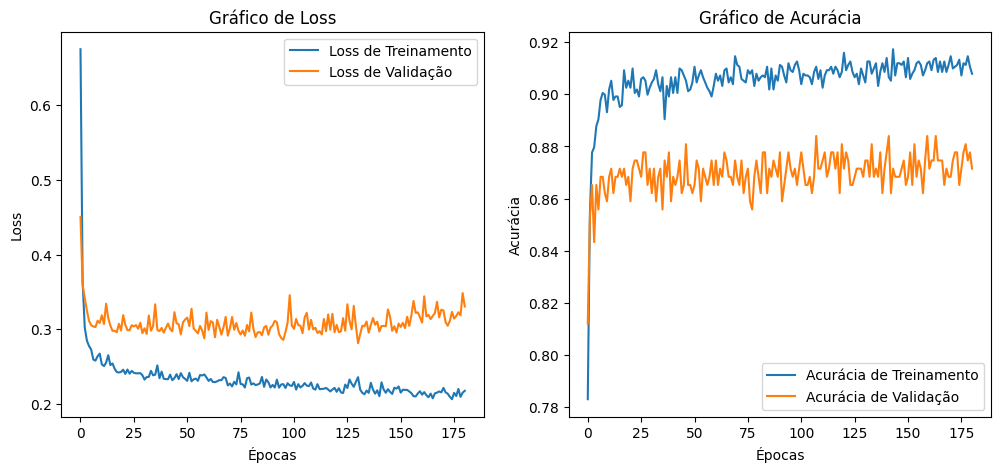

In [34]:
# Define o modelo para os dados de LDA
modelo_lda = treinar_modelo(modelo_lda, X_train_lda, y_train, X_val_lda, y_val)

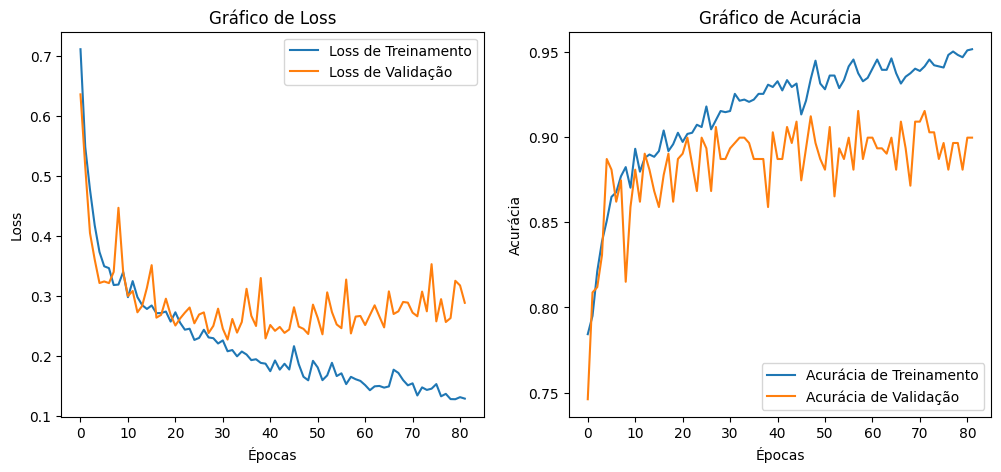

In [35]:
# Define o modelo para os dados de PCA
modelo_pca = treinar_modelo(modelo_pca, X_train_pca, y_train, X_val_pca, y_val)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def metricas_classificacao(y_real_, y_pred_, nome):
    y_real = [np.argmax(x) for x in y_real_]
    y_pred = [np.argmax(x) for x in y_pred_]

    # Calcular métricas
    metrics = {
        "Acurácia": accuracy_score(y_real, y_pred),
        "Precisão (macro)": precision_score(y_real, y_pred, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_real, y_pred, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_real, y_pred, average='macro', zero_division=0)
    }
    clear_output(wait=False)
    print(f"{nome}\n")
    # Printar métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Calcular a Matriz de Confusão
    confusion_mat = confusion_matrix(y_real, y_pred)

    # Printar Matriz de Confusão
    print("Matriz de Confusão:")
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

Normal

Acurácia: 0.9216300940438872
Precisão (macro): 0.8472549019607842
Recall (macro): 0.8932121212121212
F1-Score (macro): 0.8663387978142078
Matriz de Confusão:


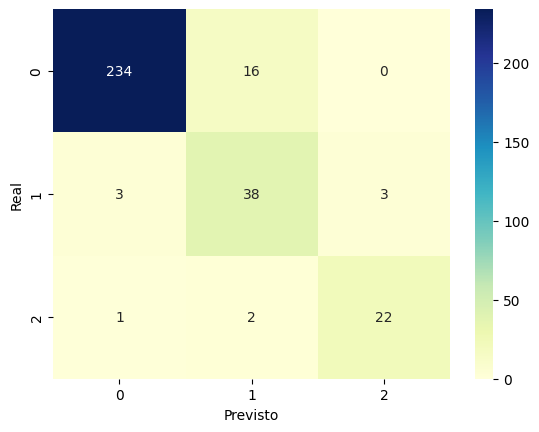

In [37]:
y_pred = modelo.predict(X_test)
metricas_classificacao(y_test, y_pred, 'Normal')

PCA

Acurácia: 0.9247648902821317
Precisão (macro): 0.8738496438725272
Recall (macro): 0.8748484848484849
F1-Score (macro): 0.8720107640702799
Matriz de Confusão:


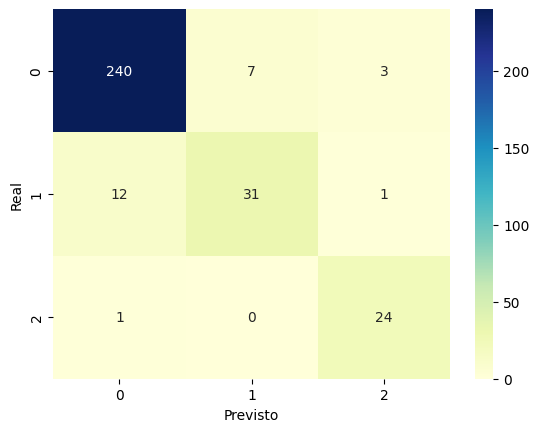

In [38]:
y_pred_pca = modelo_pca.predict(X_test_pca)
metricas_classificacao(y_test, y_pred_pca, 'PCA')

LDA

Acurácia: 0.9028213166144201
Precisão (macro): 0.8447876447876448
Recall (macro): 0.7747878787878788
F1-Score (macro): 0.8058502510368916
Matriz de Confusão:


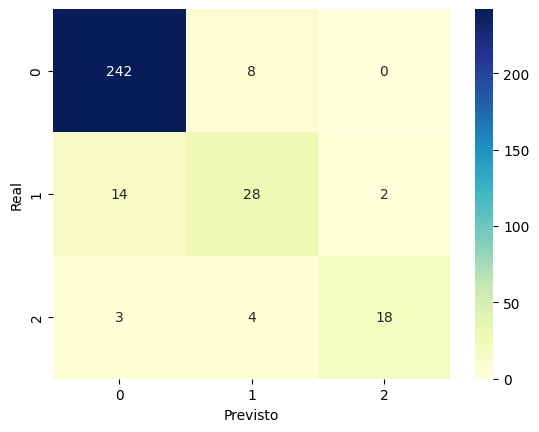

In [39]:
y_pred_lda = modelo_lda.predict(X_test_lda)
metricas_classificacao(y_test, y_pred_lda, 'LDA')